# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [27]:
# Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [4]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

Text(0.5, 1.0, 'x,y,z')

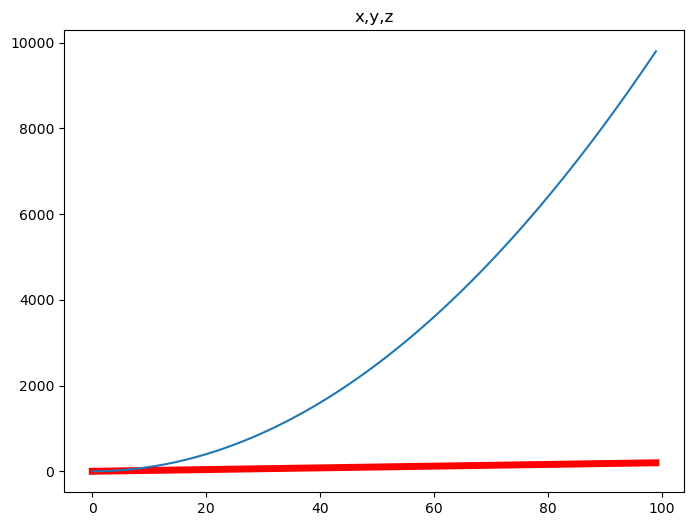

In [5]:
# Method 1
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(8,6))
plt.plot(x,y,linewidth=5,color='red')
plt.plot(x,z,linewidth=1.5)
axs.set_title("x,y,z")


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

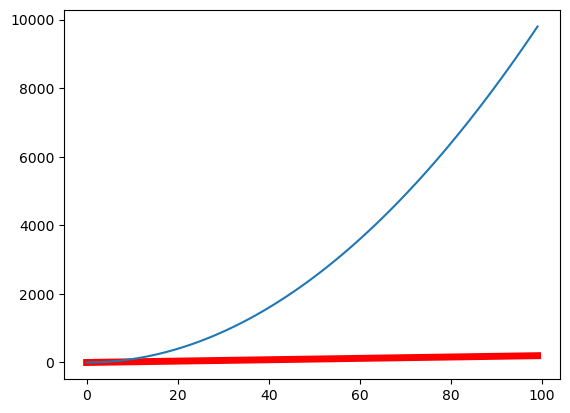

In [6]:
# Method 2
plt.subplots(nrows=1, ncols=1)
plt.plot(x,y,linewidth=5,color='red')
plt.plot(x,z,linewidth=1.5)



#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

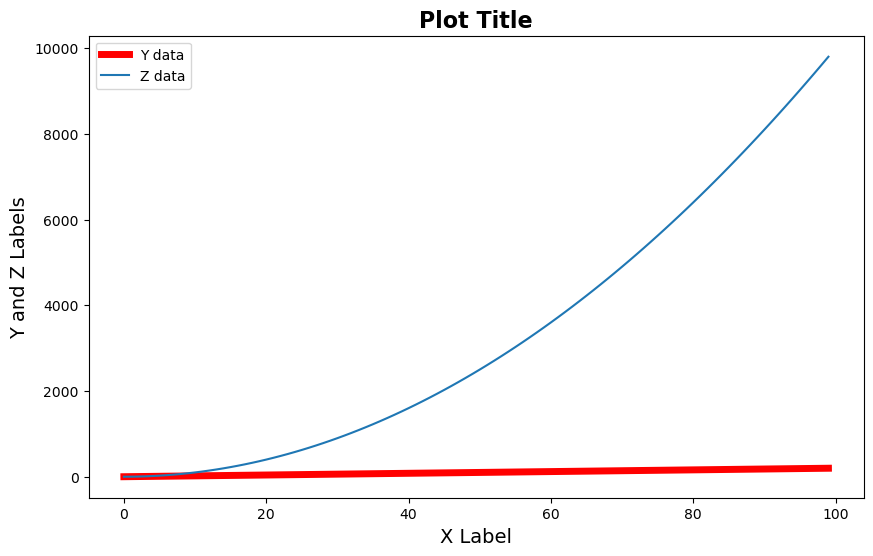

In [7]:
# your code here
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6)) 
ax.plot(x, y, linewidth=5, color='red', label='Y data')
ax.plot(x, z, linewidth=1.5, label='Z data')
ax.set_title('Plot Title', fontsize=16, fontweight='bold')
ax.set_xlabel('X Label', fontsize=14)
ax.set_ylabel('Y and Z Labels', fontsize=14)
ax.legend()
plt.show()


#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

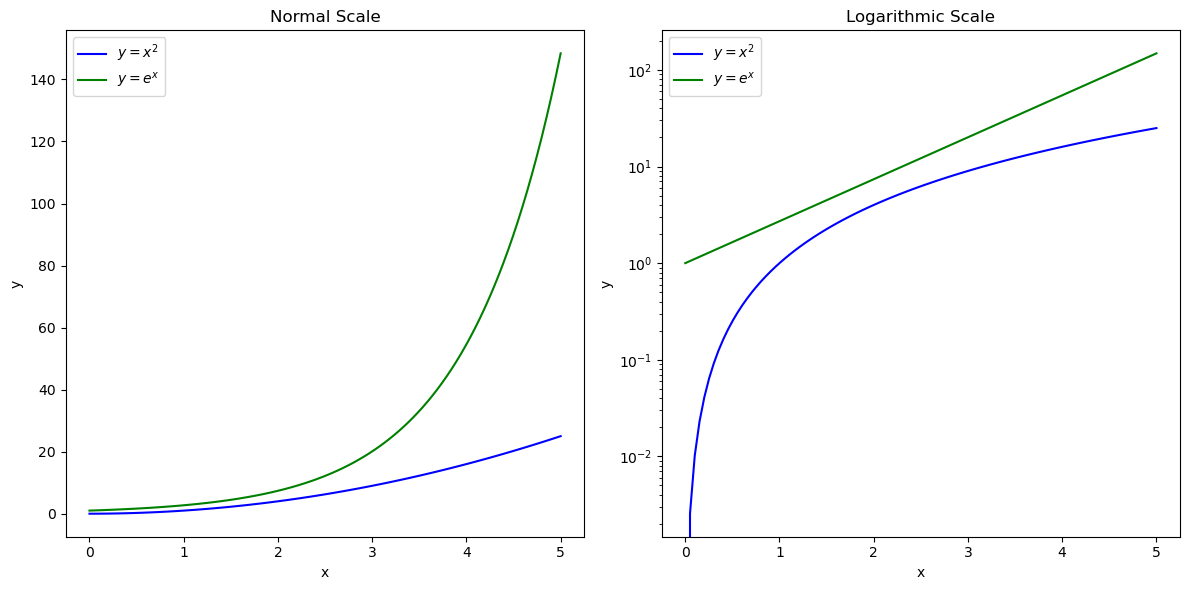

In [8]:
# Define the x values
x = np.linspace(0, 5, 100)

# Define the y values for y = x^2 and y = e^x
y1 = x**2
y2 = np.exp(x)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot with normal scale
axs[0].plot(x, y1, label='$y = x^2$', color='blue')
axs[0].plot(x, y2, label='$y = e^x$', color='green')
axs[0].set_title('Normal Scale')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()

# Plot with logarithmic scale
axs[1].plot(x, y1, label='$y = x^2$', color='blue')
axs[1].plot(x, y2, label='$y = e^x$', color='green')
axs[1].set_title('Logarithmic Scale')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_yscale('log')
axs[1].legend()

plt.tight_layout()
plt.show()


#### As a bonus challenge, try to add a legend to the plot.

In [11]:
# your code here

#ADDED UP!

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
fitbit2 = pd.read_csv('../data/fitbit2.csv')
fitbit2.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [10]:
df = pd.DataFrame(fitbit2)

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

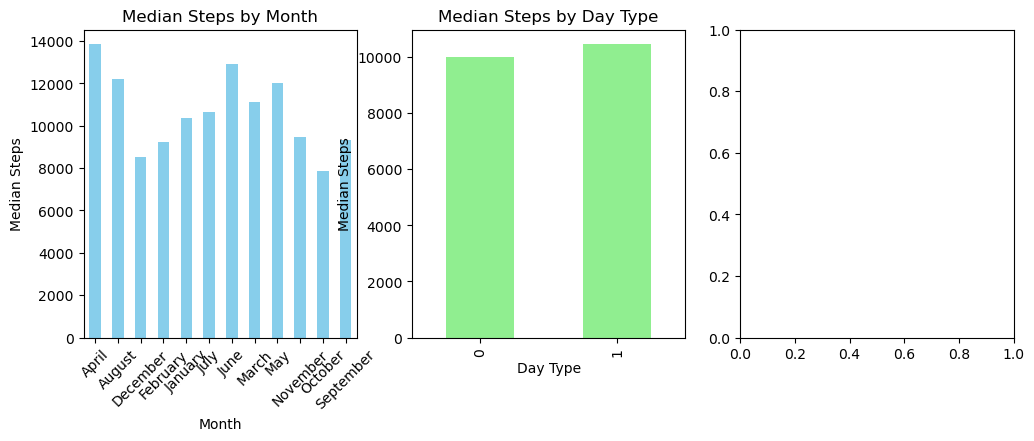

In [11]:
# Calculate median steps by month
median_steps_month = df.groupby('Months')['Steps'].median()

# Calculate median steps by weekday/weekend
median_steps_day = df.groupby('Work_or_Weekend')['Steps'].median()

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot median steps by month
plt.sca(axs[0])
median_steps_month.plot(kind='bar', color='skyblue')
plt.title('Median Steps by Month')
plt.xlabel('Month')
plt.ylabel('Median Steps')

# Adjust x-axis ticks
plt.xticks(rotation=45)

# Plot median steps by weekday/weekend
plt.sca(axs[1])
median_steps_day.plot(kind='bar', color='lightgreen')
plt.title('Median Steps by Day Type')
plt.xlabel('Day Type')
plt.ylabel('Median Steps')

# Save the figures
plt.savefig('../data/fitbit_steps_analysis.png')

plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

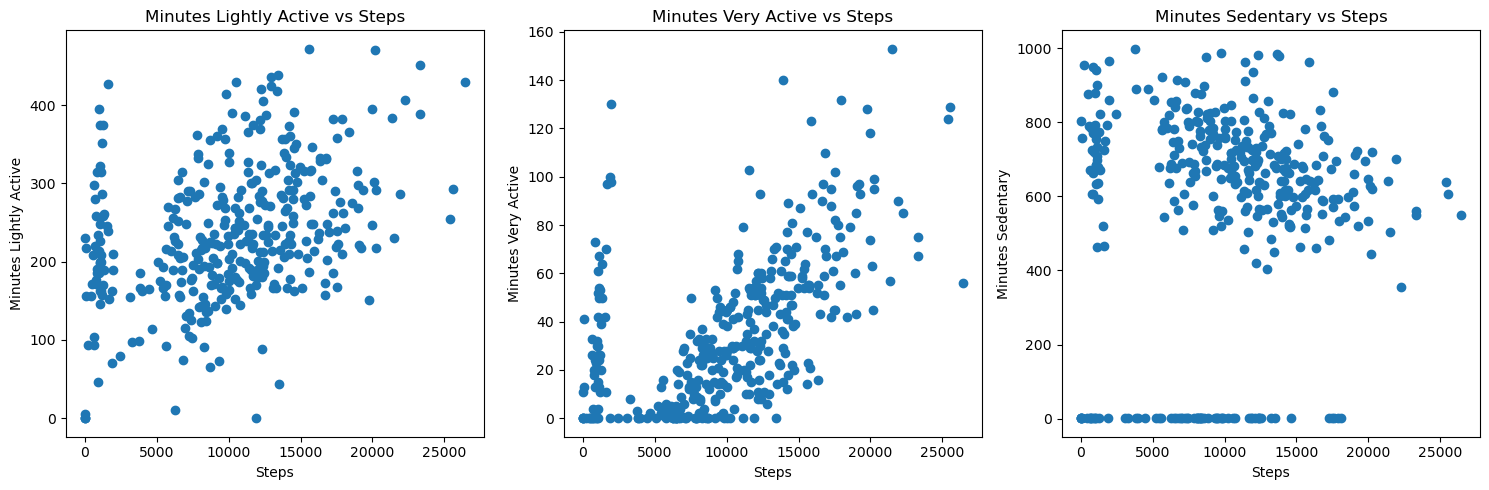

In [12]:
# your code here
# Features for scatter plots
features = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, feature in enumerate(features):
    plt.sca(axs[i])
    plt.scatter(df['Steps'], df[feature])
    plt.title(f'{feature} vs Steps')
    plt.xlabel('Steps')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [13]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')


#### Explore the titanic dataset using Pandas dtypes.

In [14]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [18]:
# NUMERICAL VARIABLES
# your code here
numerical_columns = titanic.select_dtypes(include=['int','float'])
numerical_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [19]:
# CATEGORICAL VARIABLES
# your code here
categorical_columns = titanic.select_dtypes(include=['object', 'category'])
categorical_columns

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [23]:
# your code here
plt.style.use('classic')
plt.figure(figsize=(12,6))

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

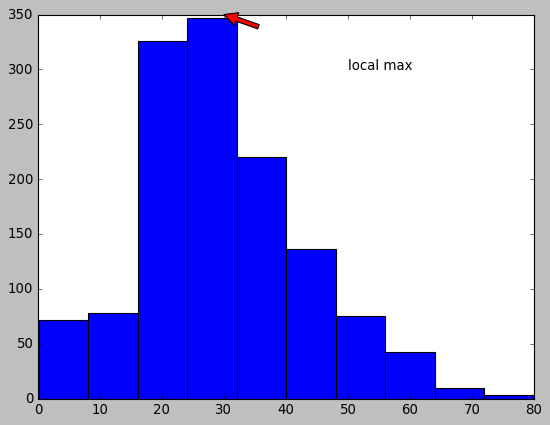

In [29]:
# your code here
plt.hist(titanic['Age'])
plt.annotate('local max', xy=(30,350), xytext=(50,300),
            arrowprops=dict(facecolor='red',shrink=0.7),)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

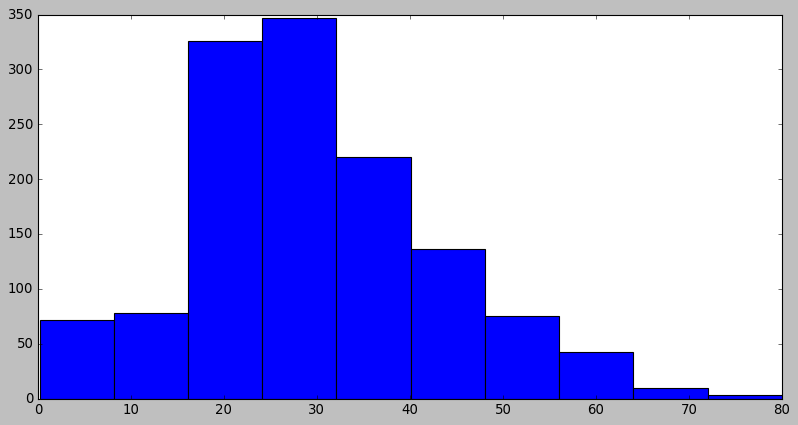

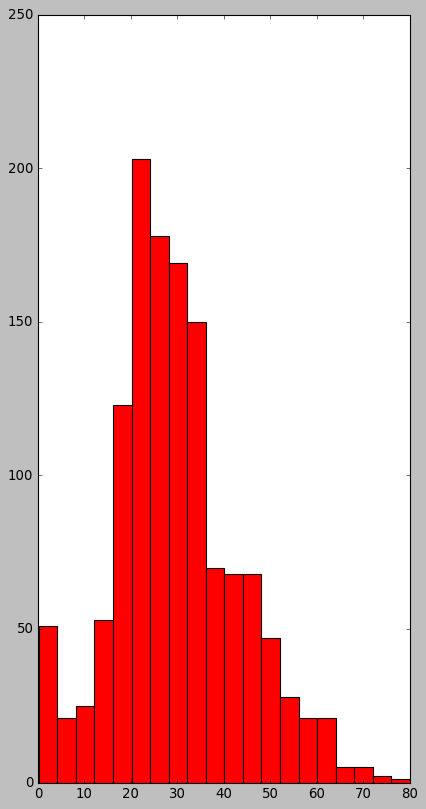

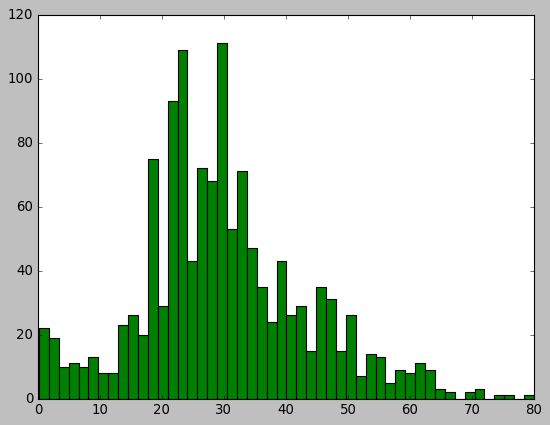

In [30]:
# your code here
plt.figure(figsize=(12,6))
plt.hist(titanic['Age'],bins=10,color='blue')
plt.show()
plt.figure(figsize=(6,12))
plt.hist(titanic['Age'],bins=20,color='red')
plt.show()
plt.hist(titanic['Age'],bins=50,color='green')
plt.show()

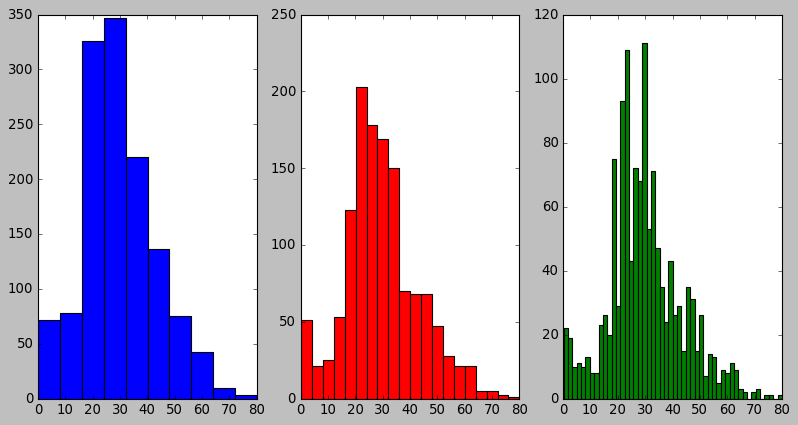

In [32]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(12,6))

axs[0].hist(titanic['Age'],bins=10,color='blue')
axs[1].hist(titanic['Age'],bins=20,color='red')
axs[2].hist(titanic['Age'],bins=50,color='green')
plt.show()

#### How does the bin size affect your plot?

In [33]:
"""
Affects the readability of the plots"""

'\nAffects the readability of the plots'

#### Use seaborn to show the distribution of column `Age`.

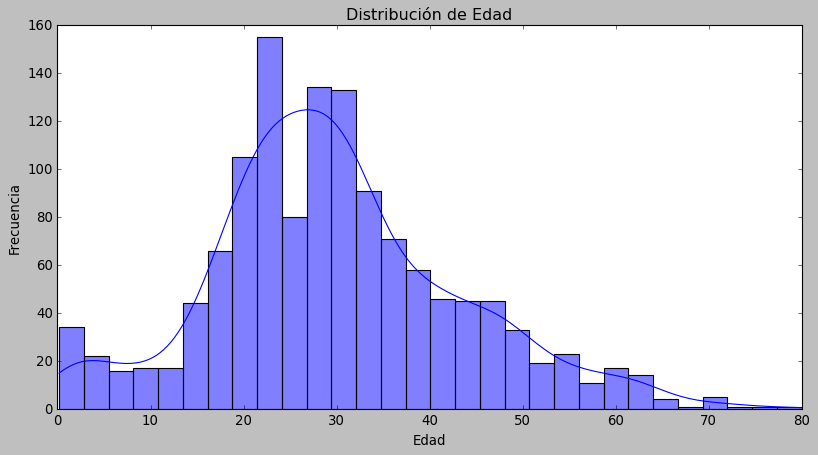

In [34]:
# your code here
plt.style.use('classic')

# Establecer el tamaño de la figura en (12,6)
plt.figure(figsize=(12, 6))

# Mostrar la distribución de la columna 'Age' utilizando Seaborn
sns.histplot(data=titanic, x='Age', kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

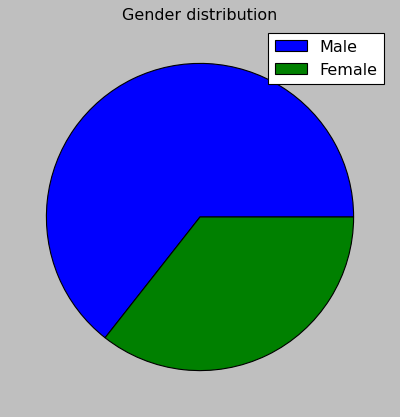

In [36]:
# Method 1 - matplotlib
# your code here
fig,ax = plt.subplots(nrows=1, ncols=1)
ax.pie(titanic['Gender'].value_counts())
ax.legend(labels=['Male','Female'], frameon=True)
plt.title('Gender distribution');
plt.show()

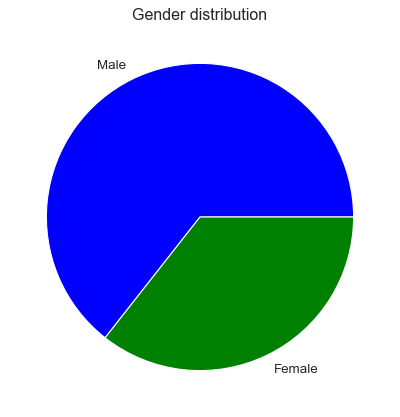

In [37]:
# Method 2 - seaborn
# your code here
sns.set_style("whitegrid") 
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.pie(titanic['Gender'].value_counts(), labels=['Male', 'Female'])
plt.title('Gender distribution')
plt.show()

#### Use the right plot to visualize the column `Pclass`.

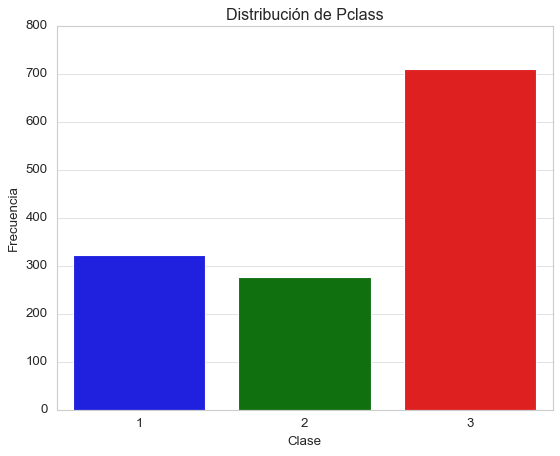

In [38]:
# your code here
sns.countplot(data=titanic, x='Pclass')
plt.title('Distribución de Pclass')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

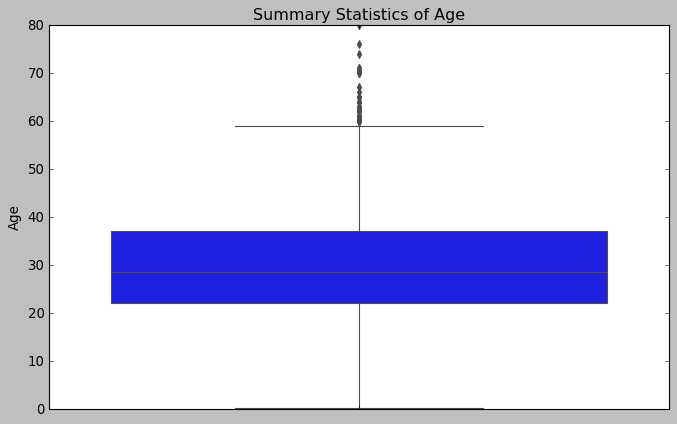

In [39]:
# your code here
plt.style.use('classic')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot for the 'Age' feature
sns.boxplot(data=titanic, y='Age')
plt.title('Summary Statistics of Age')
plt.ylabel('Age')
plt.show()

In [ ]:
"""
Boxplot"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
Distribution of ages"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

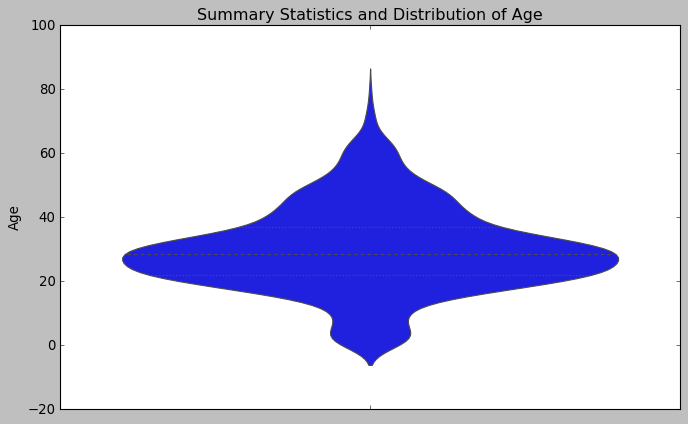

In [40]:
# your code here
plt.style.use('classic')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the violin plot for the 'Age' feature
sns.violinplot(data=titanic, y='Age', inner='quartile')
plt.title('Summary Statistics and Distribution of Age')
plt.ylabel('Age')
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [41]:
"""
 violin plot also shows the kernel density estimation (KDE) of the data distribution.
"""

'\n violin plot also shows the kernel density estimation (KDE) of the data distribution.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

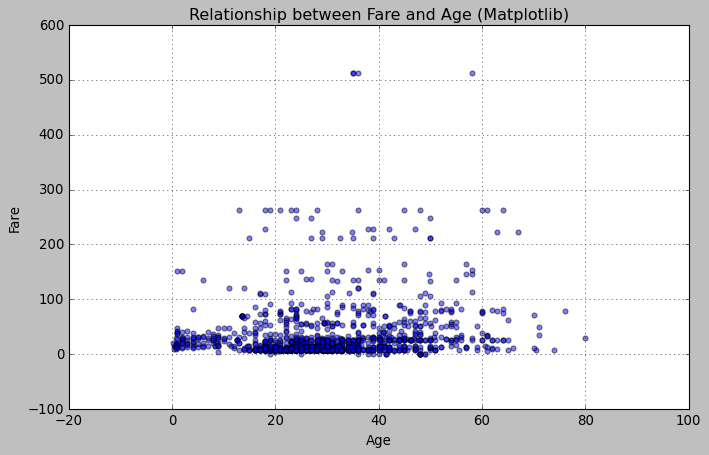

In [44]:
# Method 1 - matplotlib
# your code here

plt.style.use('classic')

plt.figure(figsize=(10, 6))

plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5)
plt.title('Relationship between Fare and Age (Matplotlib)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

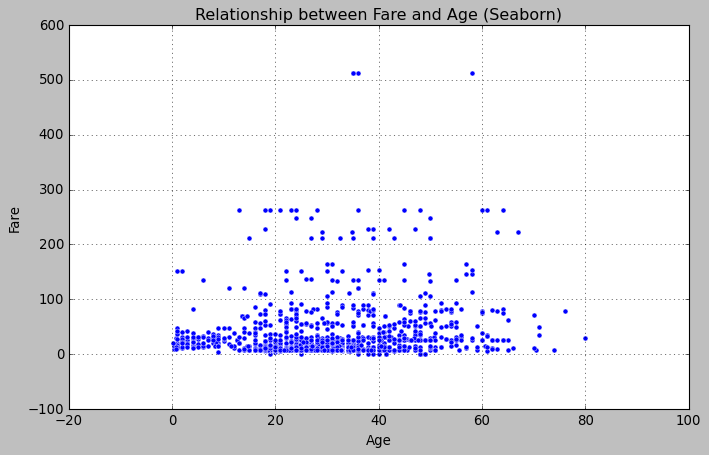

In [45]:
# Method 2 - seaborn
# your code here
plt.style.use('classic')

plt.figure(figsize=(10, 6))

sns.scatterplot(data=titanic, x='Age', y='Fare')
plt.title('Relationship between Fare and Age (Seaborn)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

#### Plot the correlation matrix using seaborn.

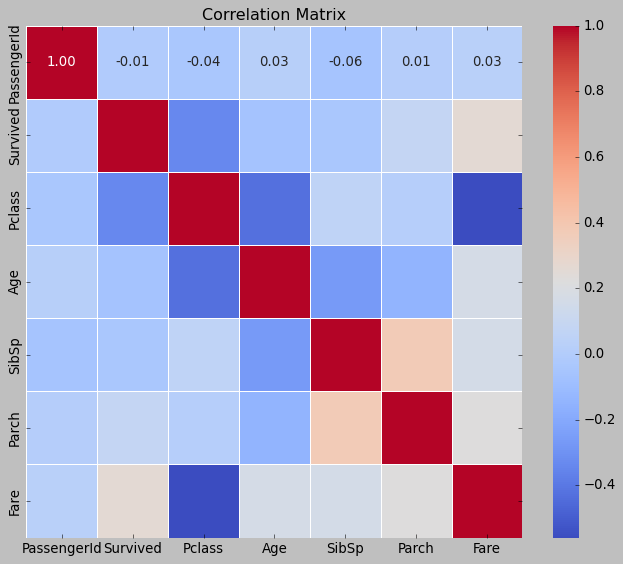

In [48]:
# your code here
corr = numerical_columns.corr()

plt.style.use('classic')

plt.figure(figsize=(10, 8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### What are the most correlated features?

In [ ]:
"""
Fare&Pclass"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

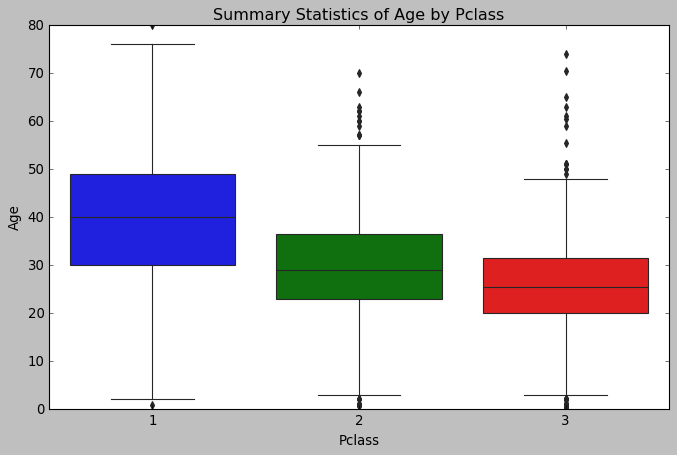

In [50]:
plt.style.use('classic')

plt.figure(figsize=(10, 6))

sns.boxplot(data=titanic, x='Pclass', y='Age')
plt.title('Summary Statistics of Age by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

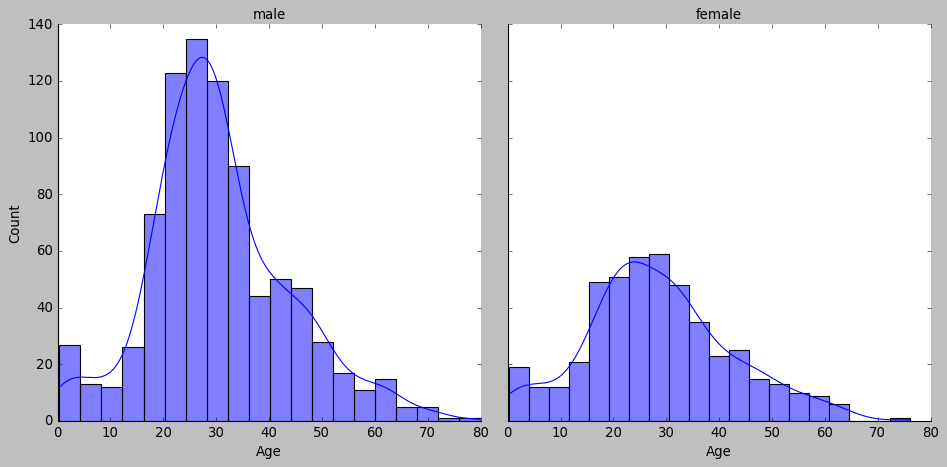

In [51]:
# your code here
plt.style.use('classic')

g = sns.FacetGrid(titanic, col="Gender", height=6)

g.map(sns.histplot, "Age", bins=20, kde=True)

g.set_titles("{col_name}")
plt.show()
